# Simple Testing Circuit using Cirq

In [1]:
import cirq
import numpy as np

In [2]:
from cirq.aqt.aqt_device import get_aqt_device
from cirq.aqt.aqt_sampler import AQTSampler
from cirq.aqt.aqt_sampler import AQTSamplerLocalSimulator
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [3]:
access_token = '2633b2d14dae4d9da7c9df2503857334'

In [4]:
device, qubits = get_aqt_device(2)
print(device)
print(cirq.Device.qubit_set)

0───1
<function Device.qubit_set at 0x7f8ed0960440>


In [12]:
circuit = cirq.Circuit(device=device)
#circuit.append(cirq.X(qubits[0]))
circuit.append(cirq.X(qubits[1]))
circuit.append(cirq.X(qubits[1]))
# circuit.append(cirq.measure(*qubits, key='x'))
#circuit.append([cirq.CNOT(qubits[1], qubits[0])])
print(circuit, qubits)

1: ───X───X─── [cirq.LineQubit(0), cirq.LineQubit(1)]


In [13]:
url = 'https://gateway.aqt.eu/marmot/sim'
aqt_sampler = AQTSampler(url, access_token=access_token)
aqt_sweep = aqt_sampler.run(circuit, repetitions=120)

In [14]:
print(aqt_sweep)
a = getattr(aqt_sweep, 'measurements')
print(a)
b = a["m"]+0
a["m"]=b
print(a)
print(b.tolist().count([0,1]))

m=000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
{'m': array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False

Counter({(0,): 120})


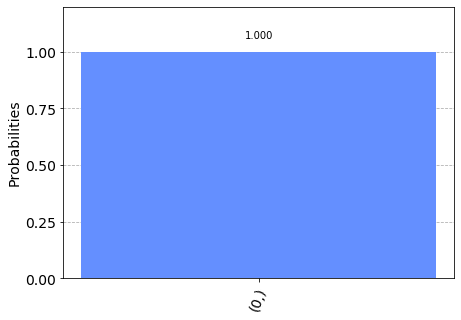

In [15]:
#cirq.plot_state_histogram(aqt_sweep)
counts = cirq.TrialResult.multi_measurement_histogram(aqt_sweep,keys=['m'])
print(counts)
plot_histogram(counts)